
0: 640x480 1 container_code, 1 gross_weight, 1 tare_weight, 80.6ms
Speed: 4.7ms preprocess, 80.6ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 480)


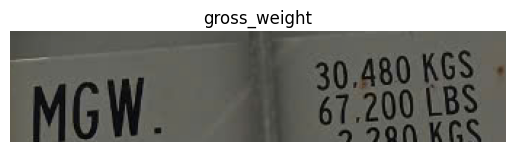

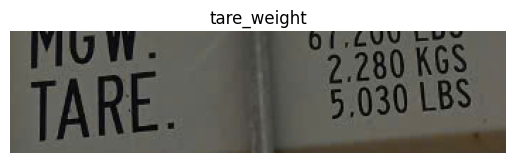

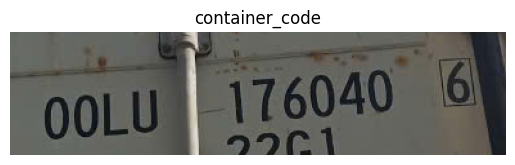

🎯 Kết quả trích xuất:
{
  "gross_weight": "mow. iss\nna 70n KS",
  "tare_weight": "MU WW. oO 780 KGS\nTARE. 5/030 LBS",
  "container_code": "ooLU 176040 B\n99f 1"
}


In [1]:

from ultralytics import YOLO
import cv2
import pytesseract
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import json

# Load model đã train
model = YOLO('/Users/tenaity/Documents/MSE/asignment/yolo_runs/container-code-detector-v1/weights/best.pt')

# Load ảnh container test 
image_path = '/Users/tenaity/Documents/MSE/asignment/oolu1760406.jpg' 
image = cv2.imread(image_path)

# Detect đối tượng
results = model(image)

# Lấy ra bounding box và class
boxes = results[0].boxes.xyxy.cpu().numpy()
classes = results[0].boxes.cls.cpu().numpy()

# Danh sách class tên (match với data.yaml)
class_names = ['container_code', 'gross_weight', 'tare_weight']

# OCR kết quả từng vùng
output = {}

for i, box in enumerate(boxes):
    cls_id = int(classes[i])
    label = class_names[cls_id]

    x1, y1, x2, y2 = box.astype(int)
    cropped = image[y1:y2, x1:x2]

    # Hiển thị vùng crop (debug)
    plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
    plt.title(f"{label}")
    plt.axis("off")
    plt.show()

    # OCR vùng cắt
    gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
    text = pytesseract.image_to_string(gray, config='--oem 3 --psm 6').strip()
    output[label] = text

# In kết quả JSON
print("🎯 Kết quả trích xuất:")
print(json.dumps(output, indent=2, ensure_ascii=False))
